<a href="https://colab.research.google.com/github/AjayiTemiloluwa/AjayiTemiloluwa/blob/main/Kick_Detector_Data_cleaning_and_Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
def text_to_dataset(file_name, dataset_name):
    """
    Converts a text file into a structured dataset with a fixed number of values per row.

    Parameters:
    file_name (str): Name of the text file to process.
    dataset_name (str): Name of the output dataset file (without extension).
    """

    # Load text data
    with open(file_name, "r") as file:
        data = file.read().split()  # Read and split into a list of values

    # Convert data to numeric
    data = np.array(data, dtype=float)

    # Define expected columns
    column_names = [
        "Depth (m)", "True Vertical Depth (m)", "Bit Diameter (in)", "Rate of Penetration (m/h)",
        "Average Hookload (T)", "Max Connection Hookload (T)", "Weight on Bit (T)",
        "Average Torque (KJ)", "Max Torque (KJ)", "Average String RPM (C/min)", "Average Bit RPM (C/min)",
        "Avg Pump Pressure (Bar)", "Avg Total Pit Volume (m³)", "Avg Mud Flow Out (L/min)",
        "Avg Mud Flow In (L/min)", "Avg Mud Weight Out (SG)", "Avg Mud Weight In (SG)",
        "Avg Mud Temp Out (°C)", "Avg Mud Temp In (°C)", "Avg Mud Resistivity Out (Ohmm)",
        "Avg Mud Resistivity In (Ohmm)", "Effective Circulating Density at TD (SG)",
        "Cumulative On-Bottom Time (h)", "Bit Drilled Distance (m)", "Bit Rotating Time (h)",
        "Total Bit Revolutions", "Total Circulating Time (h)", "Formation Pore Pressure Gradient (SG)",
        "Corrected Drilling Exponent", "Avg Total Gas", "Max Total Gas",
        "Avg Hydrogen Sulfide", "Max Hydrogen Sulfide", "Avg Chrom 1 Methane (ppm)", "Ethane (ppm)",
        "Avg Chrom 1 Propane (ppm)", "Avg Chrom 1 Iso-Butane (ppm)", "Avg Chrom 1 Normal Butane (ppm)",
        "Avg Chrom 1 Iso-Pentane (ppm)", "Avg Chrom 1 Normal Pentane (ppm)", "Neo-Pentane (ppm)",
        "Gas Ratio C1/C2", "Gas Ratio C1/C3", "Gas Ratio C1/C4", "Gas Ratio C1/C5",
        "Lithology Code", "Natural Fluorescence Code", "Cut Fluorescence Code",
        "Calcite Content", "Dolomite Content"
    ]

    num_columns = len(column_names)  # Expected number of columns per row
    actual_columns = len(data) % num_columns  # Check if data matches expected structure

    # If actual columns don't match expected, adjust dynamically
    if actual_columns != 0:
        print(f"Warning: Data may not be perfectly divisible by {num_columns} columns. Trimming excess data.")
        num_rows = len(data) // num_columns  # Get the number of full rows
        data = data[:num_rows * num_columns]  # Trim extra values
    else:
        num_rows = len(data) // num_columns

    # Reshape data into rows of expected columns
    data = data.reshape((num_rows, num_columns))

    # **IMPORTANT**: Adjust column names if there's a mismatch
    if data.shape[1] != len(column_names):
        column_names = column_names[:data.shape[1]]  # Ensure correct matching

    # Create DataFrame
    df = pd.DataFrame(data, columns=column_names)

    # Save as CSV
    csv_filename = dataset_name + ".csv"
    df.to_csv(csv_filename, index=False)

    print(f"Dataset saved as {csv_filename} with {df.shape[0]} rows and {df.shape[1]} columns.")
    return df



In [3]:
mwd_ds1 = text_to_dataset("MUD15F11T2.txt", "mwd_data1")
mwd_ds1

Dataset saved as mwd_data1.csv with 4306 rows and 50 columns.


,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Neo-Pentane (ppm),Gas Ratio C1/C2,Gas Ratio C1/C3,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content
0,257.0,257.00,26.0,1.83,108.90,111.03,1.00,0.01,0.01,1.65,...,-999.25,0.0000,0.00,0.00,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
1,258.0,258.00,26.0,1.64,106.21,109.47,0.06,0.01,0.01,1.65,...,-999.25,0.0000,0.00,0.00,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
2,259.0,259.00,26.0,1.83,107.54,110.25,1.00,0.01,0.01,1.65,...,-999.25,0.0000,0.00,0.00,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
3,260.0,260.00,26.0,1.83,106.73,108.68,1.00,0.01,0.01,1.65,...,-999.25,0.0000,0.00,0.00,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
4,261.0,261.00,26.0,2.05,107.52,109.86,1.00,0.01,0.01,1.65,...,-999.25,0.0000,0.00,0.00,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301,4558.0,3394.34,8.5,14.96,155.06,157.71,8.78,25.31,28.75,180.34,...,-999.25,56.0686,96.83,3.32,337.13,220.00,-999.25,-999.25,-999.25,-999.25
4302,4559.0,3395.30,8.5,14.94,158.88,160.84,4.97,25.54,26.89,180.34,...,-999.25,42.0514,102.31,3.32,337.13,220.00,-999.25,-999.25,-999.25,-999.25
4303,4560.0,3396.27,8.5,14.95,155.66,156.92,8.08,24.30,25.61,180.34,...,-999.25,28.0343,102.75,3.32,337.13,220.00,-999.25,-999.25,-999.25,-999.25
4304,4561.0,3397.24,8.5,12.09,163.92,165.55,2.08,24.42,26.47,179.71,...,-999.25,14.0171,54.43,3.32,337.13,220.00,-999.25,-999.25,-999.25,-999.25


In [4]:
mwd_ds2 = text_to_dataset("MUD15f1.txt", "mwd_data2")
mwd_ds2

Dataset saved as mwd_data2.csv with 3410 rows and 50 columns.


,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Neo-Pentane (ppm),Gas Ratio C1/C2,Gas Ratio C1/C3,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content
0,223.0,223.00,26.0,1.50,96.39,100.84,0.19,3.22,7.37,59.49,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,224.0,224.00,26.0,3.84,97.11,104.37,0.60,3.19,11.72,59.90,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,225.0,225.00,26.0,3.51,96.76,103.19,0.58,3.90,13.62,59.73,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,226.0,226.00,26.0,21.85,97.11,104.76,0.36,0.01,0.01,0.78,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,227.0,227.00,26.0,33.79,94.76,96.52,2.55,0.01,0.01,0.78,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,3628.0,3326.66,8.5,15.04,156.24,157.31,5.77,18.70,25.95,159.92,...,-999.25,45.87,0.00,0.00,0.00,90.00,-999.25,-999.25,-999.25,-999.25
3406,3629.0,3327.60,8.5,15.04,155.61,156.92,6.36,19.22,26.86,159.73,...,-999.25,46.20,0.00,0.00,0.00,90.00,-999.25,-999.25,-999.25,-999.25
3407,3630.0,3328.53,8.5,15.04,155.27,156.92,6.58,19.05,24.94,160.53,...,-999.25,44.91,-999.25,0.00,0.00,90.00,-999.25,-999.25,-999.25,-999.25
3408,3631.0,3329.46,8.5,15.04,155.71,156.92,6.26,18.54,25.00,160.08,...,-999.25,36.30,-999.25,0.00,0.00,90.00,-999.25,-999.25,-999.25,-999.25


In [5]:
mwd_ds3 = text_to_dataset("MUD15f11FA.txt", "mwd_data3")
mwd_ds3

Dataset saved as mwd_data3.csv with 1177 rows and 50 columns.


,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Neo-Pentane (ppm),Gas Ratio C1/C2,Gas Ratio C1/C3,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content
0,2586.0,2453.01,8.5,13.95,141.81,142.80,1.41,13.00,16.84,60.03,...,-999.25,18.58,64.87,26.10,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
1,2587.0,2453.80,8.5,13.82,141.96,142.80,1.28,12.26,15.08,60.53,...,-999.25,17.28,62.35,26.10,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
2,2588.0,2454.59,8.5,13.83,142.38,143.19,0.80,11.99,13.83,60.53,...,-999.25,16.28,59.13,26.10,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
3,2589.0,2455.38,8.5,13.73,140.77,142.02,2.47,13.90,15.77,60.53,...,-999.25,15.68,58.84,26.10,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
4,2590.0,2456.17,8.5,11.11,140.56,141.23,2.68,13.54,15.42,60.53,...,-999.25,15.33,58.51,26.10,0.00,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,3758.0,3123.42,8.5,19.74,151.41,152.61,5.31,19.49,22.52,179.72,...,-999.25,18.71,16.80,21.50,31.37,300.00,-999.25,-999.25,-999.25,-999.25
1173,3759.0,3124.19,8.5,19.68,151.54,152.61,5.29,20.16,22.39,180.30,...,-999.25,18.31,16.20,20.53,30.16,300.00,-999.25,-999.25,-999.25,-999.25
1174,3760.0,3124.95,8.5,19.73,151.89,152.61,5.06,20.21,22.09,180.16,...,-999.25,18.12,15.75,19.90,28.91,300.00,-999.25,-999.25,-999.25,-999.25
1175,3761.0,3125.72,8.5,19.72,151.77,153.39,5.02,19.97,22.11,180.00,...,-999.25,18.19,15.62,20.08,28.43,300.00,-999.25,-999.25,-999.25,-999.25


In [6]:
mwd_ds4 = text_to_dataset("MUD15f11FB.txt", "mwd_data4")
mwd_ds4

Dataset saved as mwd_data4.csv with 2186 rows and 50 columns.


,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Neo-Pentane (ppm),Gas Ratio C1/C2,Gas Ratio C1/C3,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content
0,2585.0,2452.24,12.25,4.95,146.33,147.51,1.00,13.39,16.49,40.15,...,-999.25,5.66,1.20,14.03,1.00,-999.25,-999.25,-999.25,-999.25,-999.25
1,2586.0,2453.03,12.25,4.94,144.52,146.72,1.40,12.96,15.82,39.80,...,-999.25,6.38,1.20,17.86,1.00,90.00,-999.25,-999.25,-999.25,-999.25
2,2587.0,2453.82,12.25,4.44,147.00,149.47,1.93,14.28,18.66,40.02,...,-999.25,5.57,1.20,7.31,1.00,90.00,-999.25,-999.25,-999.25,-999.25
3,2588.0,2454.61,12.25,4.64,147.73,150.25,1.29,13.90,16.90,40.02,...,-999.25,6.35,1.20,12.82,1.00,90.00,-999.25,-999.25,-999.25,-999.25
4,2589.0,2455.40,12.25,4.77,148.81,150.25,1.00,13.13,15.88,40.02,...,-999.25,1.72,0.91,1.80,1.00,90.00,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,4766.0,3254.12,8.50,13.36,131.45,134.57,14.22,27.47,32.76,159.86,...,-999.25,1.90,2.28,2.13,0.29,180.00,-999.25,-999.25,-999.25,-999.25
2182,4767.0,3254.92,8.50,11.87,130.86,134.57,14.20,27.10,31.81,159.86,...,-999.25,1.90,2.28,2.13,0.29,180.00,-999.25,-999.25,-999.25,-999.25
2183,4768.0,3255.72,8.50,17.50,131.70,134.96,13.61,26.56,30.57,159.85,...,-999.25,1.90,2.28,2.13,0.29,180.00,-999.25,-999.25,-999.25,-999.25
2184,4769.0,3256.53,8.50,20.83,131.81,133.00,13.64,26.35,30.35,160.26,...,-999.25,0.00,0.00,0.00,0.00,180.00,-999.25,-999.25,-999.25,-999.25


In [7]:
mwd_ds5 = text_to_dataset("MUD15f1A.txt", "mwd_data5")
mwd_ds5

Dataset saved as mwd_data5.csv with 1063 rows and 50 columns.


,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Neo-Pentane (ppm),Gas Ratio C1/C2,Gas Ratio C1/C3,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content
0,2620.0,2472.27,8.5,6.53,139.81,140.84,2.11,10.23,15.00,80.10,...,-999.25,25.36,72.57,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
1,2621.0,2473.14,8.5,6.55,137.01,138.49,4.91,11.66,16.55,80.09,...,-999.25,27.60,78.38,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
2,2622.0,2474.01,8.5,6.52,138.14,139.27,3.79,9.66,16.48,80.22,...,-999.25,33.69,101.80,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
3,2623.0,2474.87,8.5,6.52,138.99,140.06,2.88,10.30,15.85,80.11,...,-999.25,38.44,132.79,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
4,2624.0,2475.74,8.5,6.53,138.59,139.66,3.36,10.93,16.43,79.78,...,-999.25,38.89,132.87,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,3678.0,3236.83,8.5,10.72,152.16,153.78,3.85,18.47,24.70,160.03,...,-999.25,0.00,42.04,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
1059,3679.0,3237.55,8.5,10.69,151.60,153.00,4.40,18.52,26.01,159.57,...,-999.25,0.00,42.26,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
1060,3680.0,3238.27,8.5,10.76,152.11,153.00,3.89,17.36,23.96,160.13,...,-999.25,0.00,45.43,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25
1061,3681.0,3238.99,8.5,10.69,152.12,153.78,3.87,17.99,24.45,159.81,...,-999.25,0.00,43.45,0.0,0.0,90.0,-999.25,-999.25,-999.25,-999.25


In [8]:
data_files = [
    "mwd_data1.csv",
    "mwd_data2.csv",
    "mwd_data3.csv",
    "mwd_data4.csv",
    "mwd_data5.csv"
]

# Read and concatenate all datasets
full_mwd_df = pd.concat([pd.read_csv(file) for file in data_files], ignore_index=True)

# Save the merged dataset to a new CSV file
full_mwd_df.to_csv("full_mwd_df.csv", index=False)

# Display the first few rows
full_mwd_df

,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Neo-Pentane (ppm),Gas Ratio C1/C2,Gas Ratio C1/C3,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content
0,257.0,257.00,26.0,1.83,108.90,111.03,1.00,0.01,0.01,1.65,...,-999.25,0.0,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25
1,258.0,258.00,26.0,1.64,106.21,109.47,0.06,0.01,0.01,1.65,...,-999.25,0.0,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25
2,259.0,259.00,26.0,1.83,107.54,110.25,1.00,0.01,0.01,1.65,...,-999.25,0.0,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25
3,260.0,260.00,26.0,1.83,106.73,108.68,1.00,0.01,0.01,1.65,...,-999.25,0.0,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25
4,261.0,261.00,26.0,2.05,107.52,109.86,1.00,0.01,0.01,1.65,...,-999.25,0.0,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,3678.0,3236.83,8.5,10.72,152.16,153.78,3.85,18.47,24.70,160.03,...,-999.25,0.0,42.04,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25
12138,3679.0,3237.55,8.5,10.69,151.60,153.00,4.40,18.52,26.01,159.57,...,-999.25,0.0,42.26,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25
12139,3680.0,3238.27,8.5,10.76,152.11,153.00,3.89,17.36,23.96,160.13,...,-999.25,0.0,45.43,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25
12140,3681.0,3238.99,8.5,10.69,152.12,153.78,3.87,17.99,24.45,159.81,...,-999.25,0.0,43.45,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25


In [9]:
full_mwd_df.columns

Index(['Depth (m)', 'True Vertical Depth (m)', 'Bit Diameter (in)',
       'Rate of Penetration (m/h)', 'Average Hookload (T)',
       'Max Connection Hookload (T)', 'Weight on Bit (T)',
       'Average Torque (KJ)', 'Max Torque (KJ)', 'Average String RPM (C/min)',
       'Average Bit RPM (C/min)', 'Avg Pump Pressure (Bar)',
       'Avg Total Pit Volume (m³)', 'Avg Mud Flow Out (L/min)',
       'Avg Mud Flow In (L/min)', 'Avg Mud Weight Out (SG)',
       'Avg Mud Weight In (SG)', 'Avg Mud Temp Out (°C)',
       'Avg Mud Temp In (°C)', 'Avg Mud Resistivity Out (Ohmm)',
       'Avg Mud Resistivity In (Ohmm)',
       'Effective Circulating Density at TD (SG)',
       'Cumulative On-Bottom Time (h)', 'Bit Drilled Distance (m)',
       'Bit Rotating Time (h)', 'Total Bit Revolutions',
       'Total Circulating Time (h)', 'Formation Pore Pressure Gradient (SG)',
       'Corrected Drilling Exponent', 'Avg Total Gas', 'Max Total Gas',
       'Avg Hydrogen Sulfide', 'Max Hydrogen Sulfide',
    

In [10]:
full_mwd_df.value_counts('Bit Diameter (in)')

,count
Bit Diameter (in),
8.50,6825
17.50,2456
26.00,2242
12.25,619


In [11]:
def map_pipe_and_casing(df):
    """
    Maps the "Bit Diameter (in)" to corresponding "Drill Pipe Diameter (in)"
    and "Casing Diameter (in)" based on the following table:

        Bit Size (in)    Drill Pipe Size (in)    Casing Size (in)
        8.50             5.0                     7.0
        12.25            5.5                     9.625
        17.50            6.625                   13.375
        26.00            6.625                   20.0

    If the "Bit Diameter (in)" value is not in the mapping, the new columns are set to NaN.

    Parameters:
      df (pd.DataFrame): Input DataFrame that contains "Bit Diameter (in)".

    Returns:
      pd.DataFrame: DataFrame with new columns "Drill Pipe Diameter (in)" and "Casing Diameter (in)" added.
    """
    # Define the mapping dictionary: key is bit size, value is (drill pipe, casing)
    mapping_dict = {
        8.50: (5.0, 7.0),
        12.25: (5.5, 9.625),
        17.50: (6.625, 13.375),
        26.00: (6.625, 20.0)
    }

    # Function to map bit diameter to drill pipe diameter
    def get_drill_pipe(bit_dia):
        # Round bit diameter to 2 decimals to match keys
        key = round(bit_dia, 2)
        return mapping_dict.get(key, (np.nan, np.nan))[0]

    # Function to map bit diameter to casing diameter
    def get_casing(bit_dia):
        key = round(bit_dia, 2)
        return mapping_dict.get(key, (np.nan, np.nan))[1]

    # Create new columns using .apply()
    if "Bit Diameter (in)" in df.columns:
        df["Drill Pipe Diameter (in)"] = df["Bit Diameter (in)"].apply(get_drill_pipe)
        df["Casing Diameter (in)"] = df["Bit Diameter (in)"].apply(get_casing)
    else:
        df["Drill Pipe Diameter (in)"] = np.nan
        df["Casing Diameter (in)"] = np.nan

    return df

# --- Example Usage ---
# Assuming full_mwd_df is your DataFrame:
# full_mwd_df = pd.read_csv("full_mwd_df.csv")  # or however you load your dataset
full_mwd_df = map_pipe_and_casing(full_mwd_df)
print(full_mwd_df[["Bit Diameter (in)", "Drill Pipe Diameter (in)", "Casing Diameter (in)"]].head())
full_mwd_df

   Bit Diameter (in)  Drill Pipe Diameter (in)  Casing Diameter (in)
0               26.0                     6.625                  20.0
1               26.0                     6.625                  20.0
2               26.0                     6.625                  20.0
3               26.0                     6.625                  20.0
4               26.0                     6.625                  20.0


,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Gas Ratio C1/C3,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content,Drill Pipe Diameter (in),Casing Diameter (in)
0,257.0,257.00,26.0,1.83,108.90,111.03,1.00,0.01,0.01,1.65,...,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0
1,258.0,258.00,26.0,1.64,106.21,109.47,0.06,0.01,0.01,1.65,...,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0
2,259.0,259.00,26.0,1.83,107.54,110.25,1.00,0.01,0.01,1.65,...,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0
3,260.0,260.00,26.0,1.83,106.73,108.68,1.00,0.01,0.01,1.65,...,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0
4,261.0,261.00,26.0,2.05,107.52,109.86,1.00,0.01,0.01,1.65,...,0.00,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,3678.0,3236.83,8.5,10.72,152.16,153.78,3.85,18.47,24.70,160.03,...,42.04,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0
12138,3679.0,3237.55,8.5,10.69,151.60,153.00,4.40,18.52,26.01,159.57,...,42.26,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0
12139,3680.0,3238.27,8.5,10.76,152.11,153.00,3.89,17.36,23.96,160.13,...,45.43,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0
12140,3681.0,3238.99,8.5,10.69,152.12,153.78,3.87,17.99,24.45,159.81,...,43.45,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0


In [12]:
def map_pipe_and_casing(df):
    """
    Maps "Bit Diameter (in)" to corresponding "Drill Pipe Diameter (in)" and
    "Casing Diameter (in)" based on the following table:

        Bit Size (in)   Drill Pipe Size (in)   Casing Size (in)
        8.50            5.0                    7.0
        12.25           5.5                    9.625  (i.e. 9 5/8")
        17.50           6.625                  13.375 (i.e. 13 3/8")
        26.00           6.625                  20.0
    """
    mapping_dict = {
        8.50: (5.0, 7.0),
        12.25: (5.5, 9.625),
        17.50: (6.625, 13.375),
        26.00: (6.625, 20.0)
    }

    def get_drill_pipe(bit_dia):
        key = round(bit_dia, 2)
        return mapping_dict.get(key, (np.nan, np.nan))[0]

    def get_casing(bit_dia):
        key = round(bit_dia, 2)
        return mapping_dict.get(key, (np.nan, np.nan))[1]

    if "Bit Diameter (in)" in df.columns:
        df["Drill Pipe Diameter (in)"] = df["Bit Diameter (in)"].apply(get_drill_pipe)
        df["Casing Diameter (in)"] = df["Bit Diameter (in)"].apply(get_casing)
    else:
        df["Drill Pipe Diameter (in)"] = np.nan
        df["Casing Diameter (in)"] = np.nan

    return df

def calculate_annular_capacity(df):
    """
    Calculates Annular Capacity (bbl/ft) using the formula:
        Annular Capacity = 0.0009714 * ((Casing Diameter (in))^2 - (Drill Pipe Diameter (in))^2)
    """
    if "Casing Diameter (in)" in df.columns and "Drill Pipe Diameter (in)" in df.columns:
        df["Annular Capacity (bbl/ft)"] = 0.0009714 * (df["Casing Diameter (in)"]**2 - df["Drill Pipe Diameter (in)"]**2)
    else:
        df["Annular Capacity (bbl/ft)"] = np.nan
    return df

# --- Example Usage ---
# Assume full_mwd_df is your full dataset DataFrame.
# First, map the drill pipe and casing diameters:
full_mwd_df = map_pipe_and_casing(full_mwd_df)
# Now, compute Annular Capacity:
full_mwd_df = calculate_annular_capacity(full_mwd_df)

# Display the first few rows for confirmation:
full_mwd_df


,Depth (m),True Vertical Depth (m),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),Average String RPM (C/min),...,Gas Ratio C1/C4,Gas Ratio C1/C5,Lithology Code,Natural Fluorescence Code,Cut Fluorescence Code,Calcite Content,Dolomite Content,Drill Pipe Diameter (in),Casing Diameter (in),Annular Capacity (bbl/ft)
0,257.0,257.00,26.0,1.83,108.90,111.03,1.00,0.01,0.01,1.65,...,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0,0.345925
1,258.0,258.00,26.0,1.64,106.21,109.47,0.06,0.01,0.01,1.65,...,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0,0.345925
2,259.0,259.00,26.0,1.83,107.54,110.25,1.00,0.01,0.01,1.65,...,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0,0.345925
3,260.0,260.00,26.0,1.83,106.73,108.68,1.00,0.01,0.01,1.65,...,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0,0.345925
4,261.0,261.00,26.0,2.05,107.52,109.86,1.00,0.01,0.01,1.65,...,0.0,0.0,-999.25,-999.25,-999.25,-999.25,-999.25,6.625,20.0,0.345925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,3678.0,3236.83,8.5,10.72,152.16,153.78,3.85,18.47,24.70,160.03,...,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0,0.023314
12138,3679.0,3237.55,8.5,10.69,151.60,153.00,4.40,18.52,26.01,159.57,...,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0,0.023314
12139,3680.0,3238.27,8.5,10.76,152.11,153.00,3.89,17.36,23.96,160.13,...,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0,0.023314
12140,3681.0,3238.99,8.5,10.69,152.12,153.78,3.87,17.99,24.45,159.81,...,0.0,0.0,90.00,-999.25,-999.25,-999.25,-999.25,5.000,7.0,0.023314


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlations_vs_total_score(df):
    """
    For every numeric column in the dataframe (except 'Total Score'),
    compute its correlation coefficient with 'Total Score' and plot:
      1. A bar chart of correlation coefficients.
      2. Scatter plots with regression lines (one for each variable)
         plotted against 'Total Score'.

    Parameters:
      df (pd.DataFrame): Input DataFrame with a 'Total Score' column.
    """
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Ensure 'Total Score' is in the list and remove it from the comparison list
    if "Total Score" not in numeric_cols:
        raise ValueError("'Total Score' column not found in the DataFrame.")
    numeric_cols.remove("Total Score")

    # Calculate correlation coefficients with 'Total Score'
    corr_dict = {col: df["Total Score"].corr(df[col]) for col in numeric_cols}

    # --- Plot 1: Bar chart of correlation coefficients ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(corr_dict.keys()), y=list(corr_dict.values()), palette="viridis")
    plt.xticks(rotation=90)
    plt.ylabel("Correlation Coefficient with Total Score")
    plt.title("Correlation Coefficients vs Total Score")
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Scatter plots of each variable vs 'Total Score' ---
    n_vars = len(numeric_cols)
    cols = 3  # number of columns in the subplot grid
    rows = (n_vars + cols - 1) // cols  # compute required rows

    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.regplot(x="Total Score", y=col, data=df, ax=axes[i],
                    scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
        axes[i].set_title(f"Total Score vs {col}")

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# --- Example Usage ---
# Assuming df_final is the DataFrame returned by your classify_kick_dataset_spe function:
# df_final = classify_kick_dataset_spe(full_dataset, output_dataset_name="kick_classified_SPE_expanded")
# Then plot the correlations:
# plot_correlations_vs_total_score(df_final)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_scatter_and_corr(df):
    """
    For every numeric column (except 'Total Score') in the DataFrame,
    plots a scatter plot against 'Total Score' and prints the correlation coefficient.
    """
    # Ensure 'Total Score' is in the DataFrame
    if "Total Score" not in df.columns:
        raise ValueError("DataFrame must contain a 'Total Score' column.")

    # Select numeric columns and exclude 'Total Score'
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if "Total Score" in numeric_cols:
        numeric_cols.remove("Total Score")

    total_score = df["Total Score"]

    # Prepare grid for subplots
    ncols = 3
    nrows = int(np.ceil(len(numeric_cols) / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axs = axs.flatten()

    # Dictionary to store correlation coefficients
    corr_dict = {}

    # Loop through each numeric column to plot scatter vs Total Score
    for i, col in enumerate(numeric_cols):
        axs[i].scatter(total_score, df[col], alpha=0.6, edgecolor='k')
        corr = total_score.corr(df[col])
        corr_dict[col] = corr
        axs[i].set_xlabel("Total Score")
        axs[i].set_ylabel(col)
        axs[i].set_title(f"{col} vs Total Score\nCorr: {corr:.2f}")

    # Remove any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    # Print correlation coefficients for each column versus Total Score
    print("Correlation Coefficients with Total Score:")
    for col, corr in corr_dict.items():
        print(f"{col}: {corr:.2f}")

# --- Example usage ---
# Assuming 'df_final' is your classified DataFrame:
# plot_scatter_and_corr(df_final)


In [15]:
full_mwd_df.columns


Index(['Depth (m)', 'True Vertical Depth (m)', 'Bit Diameter (in)',
       'Rate of Penetration (m/h)', 'Average Hookload (T)',
       'Max Connection Hookload (T)', 'Weight on Bit (T)',
       'Average Torque (KJ)', 'Max Torque (KJ)', 'Average String RPM (C/min)',
       'Average Bit RPM (C/min)', 'Avg Pump Pressure (Bar)',
       'Avg Total Pit Volume (m³)', 'Avg Mud Flow Out (L/min)',
       'Avg Mud Flow In (L/min)', 'Avg Mud Weight Out (SG)',
       'Avg Mud Weight In (SG)', 'Avg Mud Temp Out (°C)',
       'Avg Mud Temp In (°C)', 'Avg Mud Resistivity Out (Ohmm)',
       'Avg Mud Resistivity In (Ohmm)',
       'Effective Circulating Density at TD (SG)',
       'Cumulative On-Bottom Time (h)', 'Bit Drilled Distance (m)',
       'Bit Rotating Time (h)', 'Total Bit Revolutions',
       'Total Circulating Time (h)', 'Formation Pore Pressure Gradient (SG)',
       'Corrected Drilling Exponent', 'Avg Total Gas', 'Max Total Gas',
       'Avg Hydrogen Sulfide', 'Max Hydrogen Sulfide',
    

In [16]:
import pandas as pd
import numpy as np
import time

def classify_kick_dataset_spe(df, output_dataset_name=None):
    """
    Classifies rows in a drilling dataset into SPE/IADC-based kick types using standard conditions.

    Uses three indicators:
      1. Formation Pressure Anomaly (via "Formation Pore Pressure Gradient (SG)")
          • Minor: fppg < 1.05
          • Moderate: 1.05 ≤ fppg < 1.15
          • Severe: 1.15 ≤ fppg < 1.25
          • Extreme: fppg ≥ 1.25
      2. Influx Volume Proxy (difference between "Avg Mud Flow Out (L/min)" and "Avg Mud Flow In (L/min)")
          • Minor: difference < 10 L/min
          • Moderate: 10 ≤ difference < 20 L/min
          • Severe: 20 ≤ difference < 30 L/min
          • Extreme: difference ≥ 30 L/min
      3. Gas Indicator (using "Avg Total Gas")
          • Minor: gas < 150
          • Moderate: 150 ≤ gas < 250
          • Severe: 250 ≤ gas < 400
          • Extreme: gas ≥ 400

    Each indicator is scored (0, 2, 3, or 4) and summed to yield a Total Score (max=12), which is mapped as:
         Total Score = 0           : No Kick
         Total Score 1–3         : Minor Kick
         Total Score 4–6         : Moderate Kick
         Total Score 7–9         : Severe Kick
         Total Score 10–11       : Blowout Risk
         Total Score = 12        : Blow Out

    Also computes derived variables (e.g. Annular Capacity, TVD (ft), Calculated KMW, Pressure Gradient).

    Parameters:
      df (pd.DataFrame): Input dataset.
      output_dataset_name (str, optional): If provided, the DataFrame is saved as CSV.

    Returns:
      pd.DataFrame: DataFrame with computed fields and "Kick Type".
    """
    # --- 1. Compute Kick Classification Indicators ---
    fppg = df.get("Formation Pore Pressure Gradient (SG)", pd.Series(np.nan, index=df.index))
    flow_out = df.get("Avg Mud Flow Out (L/min)", pd.Series(np.nan, index=df.index))
    flow_in = df.get("Avg Mud Flow In (L/min)", pd.Series(np.nan, index=df.index))
    flow_diff = flow_out - flow_in
    avg_total_gas = df.get("Avg Total Gas", pd.Series(np.nan, index=df.index))

    def score_formation(val):
        if pd.isna(val):
            return np.nan
        if val < 1.05:
            return 0
        elif val < 1.15:
            return 2
        elif val < 1.25:
            return 3
        else:
            return 4

    def score_influx(val):
        if pd.isna(val):
            return np.nan
        if val < 10:
            return 0
        elif val < 20:
            return 2
        elif val < 30:
            return 3
        else:
            return 4

    def score_gas(val):
        if pd.isna(val):
            return np.nan
        if val < 150:
            return 0
        elif val < 250:
            return 2
        elif val < 400:
            return 3
        else:
            return 4

    formation_scores = fppg.apply(score_formation)
    influx_scores = flow_diff.apply(score_influx)
    gas_scores = avg_total_gas.apply(score_gas)
    total_score = formation_scores + influx_scores + gas_scores

    def classify(total):
        if pd.isna(total):
            return "Unknown"
        if total == 0:
            return "No Kick"
        elif total <= 3:
            return "Minor Kick"
        elif total <= 6:
            return "Moderate Kick"
        elif total <= 9:
            return "Severe Kick"
        elif total < 12:
            return "Blowout Risk"
        else:  # total == 12
            return "Blow Out"

    kick_type = total_score.apply(classify)
    df["Formation Score"] = formation_scores
    df["Influx Score"] = influx_scores
    df["Gas Score"] = gas_scores
    df["Total Score"] = total_score
    df["Kick Type"] = kick_type

    # --- 2. Compute Additional Derived Variables ---
    if "Casing Diameter (in)" in df.columns and "Drill Pipe Diameter (in)" in df.columns:
        df["Annular Capacity (bbl/ft)"] = 0.0009714 * (df["Casing Diameter (in)"]**2 - df["Drill Pipe Diameter (in)"]**2)
    else:
        df["Annular Capacity (bbl/ft)"] = np.nan

    if "True Vertical Depth (m)" in df.columns:
        df["TVD (ft)"] = df["True Vertical Depth (m)"] * 3.28084
    else:
        df["TVD (ft)"] = np.nan

    if "SITP (psi)" in df.columns and "Original Mud Weight (ppg)" in df.columns and "TVD (ft)" in df.columns:
        df["Calculated KMW (ppg)"] = (df["SITP (psi)"] / (df["TVD (ft)"] * 0.052)) + df["Original Mud Weight (ppg)"]
    else:
        df["Calculated KMW (ppg)"] = np.nan

    if "Avg Mud Weight Out (SG)" in df.columns:
        df["Pressure Gradient (psi/ft)"] = df["Avg Mud Weight Out (SG)"] * 8.34 * 0.052
    else:
        df["Pressure Gradient (psi/ft)"] = np.nan

    if "Bit Wear (%)" not in df.columns:
        df["Bit Wear (%)"] = np.nan

    # --- 3. Select Final Columns ---
    provided_columns = [
        'Depth (m)',
        'True Vertical Depth (m)',
        'TVD (ft)',
        'Bit Diameter (in)',
        'Rate of Penetration (m/h)',
        'Average Hookload (T)',
        'Max Connection Hookload (T)',
        'Weight on Bit (T)',
        'Average Torque (KJ)',
        'Max Torque (KJ)',
        'Average String RPM (C/min)',
        'Average Bit RPM (C/min)',
        'Avg Pump Pressure (Bar)',
        'Avg Total Pit Volume (m³)',
        'Avg Mud Flow Out (L/min)',
        'Avg Mud Flow In (L/min)',
        'Avg Mud Weight Out (SG)',
        'Avg Mud Weight In (SG)',
        'Avg Mud Temp Out (°C)',
        'Avg Mud Temp In (°C)',
        'Avg Mud Resistivity Out (Ohmm)',
        'Avg Mud Resistivity In (Ohmm)',
        'Effective Circulating Density at TD (SG)',
        'Cumulative On-Bottom Time (h)',
        'Formation Pore Pressure Gradient (SG)',
        'Avg Total Gas',
        'Casing Diameter (in)',
        'Drill Pipe Diameter (in)',
        'Annular Capacity (bbl/ft)',
        'SITP (psi)',
        'Original Mud Weight (ppg)',
        'Calculated KMW (ppg)',
        'Pressure Gradient (psi/ft)',
        'Bit Wear (%)',
        'Formation Score',
        'Influx Score',
        'Gas Score',
        'Total Score',
        'Kick Type'
    ]
    final_columns = [col for col in provided_columns if col in df.columns]
    df_final = df[final_columns].copy()

    if output_dataset_name:
        csv_filename = output_dataset_name + ".csv"
        df_final.to_csv(csv_filename, index=False)
        print(f"Classified dataset saved as '{csv_filename}' with {df_final.shape[0]} rows and {df_final.shape[1]} columns.")

    return df_final

def classify_fluid_type(row):
    """
    Classifies the fluid type of a kick based on fluid indicators.

    Conditions:
      - If the original "Kick Type" is "No Kick", then fluid classification is "No Kick".
      - Else, if "Avg Total Gas" is available and ≥ 400, classify as "Gas Kick".
      - Else, if "Avg Total Gas" is < 150 and the influx
            (i.e. "Avg Mud Flow Out (L/min)" - "Avg Mud Flow In (L/min)") is ≥ 20 L/min,
            classify as "Liquid Kick".
      - Otherwise, classify as "Mixed Kick".
    """
    if row.get("Kick Type", "") == "No Kick":
        return "No Kick"

    gas = row.get("Avg Total Gas", np.nan)
    flow_out = row.get("Avg Mud Flow Out (L/min)", np.nan)
    flow_in = row.get("Avg Mud Flow In (L/min)", np.nan)
    influx = flow_out - flow_in if not np.isnan(flow_out) and not np.isnan(flow_in) else np.nan

    if not pd.isna(gas):
        if gas >= 400:
            return "Gas Kick"
        elif gas < 150 and not pd.isna(influx) and influx >= 20:
            return "Liquid Kick"
        else:
            return "Mixed Kick"
    else:
        return "Unknown"

def integrated_classification(df, output_dataset_name=None, lag=11):
    """
    Integrates the SPE/IADC kick classification with an additional fluid type classification.
    First, it calls classify_kick_dataset_spe() to compute fields and "Kick Type".
    Then, it adds a new column "Fluid Kick Type" based on fluid indicators.
    If "Kick Type" is "No Kick", the fluid type is also "No Kick".

    Parameters:
      df (pd.DataFrame): Input dataset.
      output_dataset_name (str, optional): If provided, save the DataFrame as CSV.
      lag (int, optional): Lag (in rows) for any additional comparisons (not used in fluid type here).

    Returns:
      pd.DataFrame: DataFrame with both "Kick Type" and "Fluid Kick Type".
    """
    df_classified = classify_kick_dataset_spe(df, output_dataset_name=None)

    # Compute the fluid type using the function row-wise.
    df_classified["Fluid Kick Type"] = df_classified.apply(classify_fluid_type, axis=1)

    if output_dataset_name:
        csv_filename = output_dataset_name + ".csv"
        df_classified.to_csv(csv_filename, index=False)
        print(f"Integrated classified dataset saved as '{csv_filename}' with {df_classified.shape[0]} rows and {df_classified.shape[1]} columns.")

    return df_classified

# --- Example Usage ---
# Assume df_kick_spe_integrated is your dataset with the necessary columns.
# For example:
df_kick_spe_integrated = integrated_classification(full_mwd_df, output_dataset_name="integrated_kick_classification")
df_kick_spe_integrated


Integrated classified dataset saved as 'integrated_kick_classification.csv' with 12142 rows and 38 columns.


,Depth (m),True Vertical Depth (m),TVD (ft),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),...,Annular Capacity (bbl/ft),Calculated KMW (ppg),Pressure Gradient (psi/ft),Bit Wear (%),Formation Score,Influx Score,Gas Score,Total Score,Kick Type,Fluid Kick Type
0,257.0,257.00,843.175880,26.0,1.83,108.90,111.03,1.00,0.01,0.01,...,0.345925,NaN,0.0,NaN,0,0,0,0,No Kick,No Kick
1,258.0,258.00,846.456720,26.0,1.64,106.21,109.47,0.06,0.01,0.01,...,0.345925,NaN,0.0,NaN,0,0,0,0,No Kick,No Kick
2,259.0,259.00,849.737560,26.0,1.83,107.54,110.25,1.00,0.01,0.01,...,0.345925,NaN,0.0,NaN,0,0,0,0,No Kick,No Kick
3,260.0,260.00,853.018400,26.0,1.83,106.73,108.68,1.00,0.01,0.01,...,0.345925,NaN,0.0,NaN,0,0,0,0,No Kick,No Kick
4,261.0,261.00,856.299240,26.0,2.05,107.52,109.86,1.00,0.01,0.01,...,0.345925,NaN,0.0,NaN,0,0,0,0,No Kick,No Kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,3678.0,3236.83,10619.521337,8.5,10.72,152.16,153.78,3.85,18.47,24.70,...,0.023314,NaN,0.0,NaN,2,4,0,6,Moderate Kick,Liquid Kick
12138,3679.0,3237.55,10621.883542,8.5,10.69,151.60,153.00,4.40,18.52,26.01,...,0.023314,NaN,0.0,NaN,0,4,0,4,Moderate Kick,Liquid Kick
12139,3680.0,3238.27,10624.245747,8.5,10.76,152.11,153.00,3.89,17.36,23.96,...,0.023314,NaN,0.0,NaN,2,4,0,6,Moderate Kick,Liquid Kick
12140,3681.0,3238.99,10626.607952,8.5,10.69,152.12,153.78,3.87,17.99,24.45,...,0.023314,NaN,0.0,NaN,2,4,0,6,Moderate Kick,Liquid Kick


In [17]:
import pandas as pd
import numpy as np
import time

def classify_kick_dataset_spe(df, output_dataset_name=None):
    """
    Computes a base kick classification based on SPE/IADC-type indicators.

    Uses three indicators:
      1. Formation Pressure Anomaly (via "Formation Pore Pressure Gradient (SG)")
          - Score 0: fppg < 1.05
          - Score 2: 1.05 ≤ fppg < 1.15
          - Score 3: 1.15 ≤ fppg < 1.25
          - Score 4: fppg ≥ 1.25
      2. Influx Volume Proxy (difference between "Avg Mud Flow Out (L/min)" and "Avg Mud Flow In (L/min)")
          - Score 0: difference < 10 L/min
          - Score 2: 10 ≤ difference < 20 L/min
          - Score 3: 20 ≤ difference < 30 L/min
          - Score 4: difference ≥ 30 L/min
      3. Gas Indicator (using "Avg Total Gas")
          - Score 0: gas < 150
          - Score 2: 150 ≤ gas < 250
          - Score 3: 250 ≤ gas < 400
          - Score 4: gas ≥ 400

    The Total Score (max = 12) is mapped as follows:
         0            : No Kick
         1 – 3        : Minor Kick
         4 – 6        : Moderate Kick
         7 – 9        : Severe Kick
         10 – 11      : Blowout Risk
         12           : Blow Out

    Also computes derived variables such as TVD (ft), Calculated KMW (ppg), Pressure Gradient (psi/ft), and Annular Capacity (if available).

    Parameters:
      df (pd.DataFrame): Input dataset.
      output_dataset_name (str, optional): If provided, saves the resulting DataFrame as CSV.

    Returns:
      pd.DataFrame: DataFrame with new columns:
          - Formation Score, Influx Score, Gas Score, Total Score, Kick Type,
          - Derived variables: TVD (ft), Calculated KMW (ppg), Pressure Gradient (psi/ft), Bit Wear (%), Annular Capacity (bbl/ft)
    """
    df = df.copy()

    # --- Compute base indicators ---
    fppg = df.get("Formation Pore Pressure Gradient (SG)", pd.Series(np.nan, index=df.index))
    flow_out = df.get("Avg Mud Flow Out (L/min)", pd.Series(np.nan, index=df.index))
    flow_in = df.get("Avg Mud Flow In (L/min)", pd.Series(np.nan, index=df.index))
    flow_diff = flow_out - flow_in
    avg_total_gas = df.get("Avg Total Gas", pd.Series(np.nan, index=df.index))

    def score_formation(val):
        if pd.isna(val):
            return np.nan
        if val < 1.05:
            return 0
        elif val < 1.15:
            return 2
        elif val < 1.25:
            return 3
        else:
            return 4

    def score_influx(val):
        if pd.isna(val):
            return np.nan
        if val < 10:
            return 0
        elif val < 20:
            return 2
        elif val < 30:
            return 3
        else:
            return 4

    def score_gas(val):
        if pd.isna(val):
            return np.nan
        if val < 150:
            return 0
        elif val < 250:
            return 2
        elif val < 400:
            return 3
        else:
            return 4

    formation_scores = fppg.apply(score_formation)
    influx_scores = flow_diff.apply(score_influx)
    gas_scores = avg_total_gas.apply(score_gas)
    total_score = formation_scores + influx_scores + gas_scores

    def classify(total):
        if pd.isna(total):
            return "Unknown"
        if total == 0:
            return "No Kick"
        elif total <= 3:
            return "Minor Kick"
        elif total <= 6:
            return "Moderate Kick"
        elif total <= 9:
            return "Severe Kick"
        elif total < 12:
            return "Blowout Risk"
        else:  # total == 12
            return "Blow Out"

    df["Formation Score"] = formation_scores
    df["Influx Score"] = influx_scores
    df["Gas Score"] = gas_scores
    df["Total Score"] = total_score
    df["Kick Type"] = total_score.apply(classify)

    # --- Derived Variables ---
    # TVD (ft)
    if "True Vertical Depth (m)" in df.columns:
        df["TVD (ft)"] = df["True Vertical Depth (m)"] * 3.28084
    else:
        df["TVD (ft)"] = np.nan

    # Calculated KMW (ppg): SITP (psi) from "Avg Pump Pressure (Bar)" * 14.5038.
    if "Avg Pump Pressure (Bar)" in df.columns:
        df["SITP (psi)"] = df["Avg Pump Pressure (Bar)"] * 14.5038
    else:
        df["SITP (psi)"] = np.nan

    if "Original Mud Weight (ppg)" in df.columns:
        orig_mw = df["Original Mud Weight (ppg)"]
    elif "Avg Mud Weight Out (SG)" in df.columns:
        orig_mw = df["Avg Mud Weight Out (SG)"] * 8.34
    else:
        orig_mw = np.nan

    df["Calculated KMW (ppg)"] = np.where(
        df["TVD (ft)"].notna() & df["SITP (psi)"].notna(),
        (df["SITP (psi)"] / (df["TVD (ft)"] * 0.052)) + orig_mw,
        np.nan
    )

    # Pressure Gradient (psi/ft)
    if "Avg Mud Weight Out (SG)" in df.columns:
        df["Pressure Gradient (psi/ft)"] = df["Avg Mud Weight Out (SG)"] * 8.34 * 0.052
    else:
        df["Pressure Gradient (psi/ft)"] = np.nan

    # Annular Capacity (bbl/ft)
    # Map from "Casing Diameter (in)" and "Drill Pipe Diameter (in)"
    if "Casing Diameter (in)" in df.columns and "Drill Pipe Diameter (in)" in df.columns:
        df["Annular Capacity (bbl/ft)"] = 0.0009714 * (df["Casing Diameter (in)"]**2 - df["Drill Pipe Diameter (in)"]**2)
    else:
        df["Annular Capacity (bbl/ft)"] = np.nan

    # Bit Wear (%): use the first recorded "Bit Diameter (in)" as original.
    if "Bit Diameter (in)" in df.columns:
        try:
            original_bit_dia = df["Bit Diameter (in)"].iloc[0]
            df["Original Bit Diameter (in)"] = original_bit_dia
            df["Bit Wear (%)"] = ((original_bit_dia - df["Bit Diameter (in)"]) / original_bit_dia) * 100
        except Exception as e:
            df["Bit Wear (%)"] = np.nan
    else:
        df["Bit Wear (%)"] = np.nan

    # --- Final Selection ---
    provided_columns = [
        'Depth (m)',
        'True Vertical Depth (m)',
        'TVD (ft)',
        'Bit Diameter (in)',
        'Rate of Penetration (m/h)',
        'Average Hookload (T)',
        'Max Connection Hookload (T)',
        'Weight on Bit (T)',
        'Average Torque (KJ)',
        'Max Torque (KJ)',
        'Average String RPM (C/min)',
        'Average Bit RPM (C/min)',
        'Avg Pump Pressure (Bar)',
        'Avg Total Pit Volume (m³)',
        'Avg Mud Flow Out (L/min)',
        'Avg Mud Flow In (L/min)',
        'Avg Mud Weight Out (SG)',
        'Avg Mud Weight In (SG)',
        'Avg Mud Temp Out (°C)',
        'Avg Mud Temp In (°C)',
        'Avg Mud Resistivity Out (Ohmm)',
        'Avg Mud Resistivity In (Ohmm)',
        'Effective Circulating Density at TD (SG)',
        'Cumulative On-Bottom Time (h)',
        'Formation Pore Pressure Gradient (SG)',
        'Avg Total Gas',
        'Casing Diameter (in)',
        'Drill Pipe Diameter (in)',
        'Annular Capacity (bbl/ft)',
        'SITP (psi)',
        'Original Mud Weight (ppg)',
        'Calculated KMW (ppg)',
        'Pressure Gradient (psi/ft)',
        'Bit Wear (%)',
        'Formation Score',
        'Influx Score',
        'Gas Score',
        'Total Score',
        'Kick Type'
    ]
    final_columns = [col for col in provided_columns if col in df.columns]
    df_final = df[final_columns].copy()

    if output_dataset_name:
        df_final.to_csv(output_dataset_name + ".csv", index=False)
        print(f"Classified dataset saved as '{output_dataset_name}.csv' with {df_final.shape[0]} rows and {df_final.shape[1]} columns.")

    return df_final

def classify_fluid_type(row):
    """
    Further classifies the fluid nature of a kick into detailed groups based on gas and influx.

    Expanded criteria:
      - If the base "Kick Type" is "No Kick", then Fluid Kick Type = "No Kick".
      - If "Avg Total Gas" is ≥ 400:
            • 400 ≤ Avg Total Gas < 500  → "Minor Gas Kick"
            • 500 ≤ Avg Total Gas < 700  → "Moderate Gas Kick"
            • Avg Total Gas ≥ 700        → "Severe Gas Kick"
      - Else, if "Avg Total Gas" is < 150 and net influx (Avg Mud Flow Out - Avg Mud Flow In) is defined:
            • 20 ≤ influx < 30  → "Minor Liquid Kick"
            • 30 ≤ influx < 40  → "Moderate Liquid Kick"
            • influx ≥ 40       → "Severe Liquid Kick"
      - Otherwise, "Mixed Kick".
    """
    if row.get("Kick Type", "") == "No Kick":
        return "No Kick"

    gas = row.get("Avg Total Gas", np.nan)
    flow_out = row.get("Avg Mud Flow Out (L/min)", np.nan)
    flow_in = row.get("Avg Mud Flow In (L/min)", np.nan)
    influx = flow_out - flow_in if not (pd.isna(flow_out) or pd.isna(flow_in)) else np.nan

    if not pd.isna(gas):
        if gas >= 400:
            if 400 <= gas < 500:
                return "Minor Gas Kick"
            elif 500 <= gas < 700:
                return "Moderate Gas Kick"
            else:
                return "Severe Gas Kick"
        elif gas < 150 and not pd.isna(influx) and influx >= 20:
            if 20 <= influx < 30:
                return "Minor Liquid Kick"
            elif 30 <= influx < 40:
                return "Moderate Liquid Kick"
            elif influx >= 40:
                return "Severe Liquid Kick"
            else:
                return "Liquid Kick"
        else:
            return "Mixed Kick"
    else:
        return "Unknown"

def integrated_classification(df, output_dataset_name=None, lag=11):
    """
    Integrates the base kick classification with the expanded fluid-type analysis.

    First, it computes the base "Kick Type" (and derived variables) using classify_kick_dataset_spe().
    Then, it adds a new column "Fluid Kick Type" by applying classify_fluid_type() row-wise.

    Parameters:
      df (pd.DataFrame): Input dataset.
      output_dataset_name (str, optional): If provided, saves the integrated DataFrame as CSV.
      lag (int, optional): Not used for fluid type here.

    Returns:
      pd.DataFrame: DataFrame with both "Kick Type" and "Fluid Kick Type" columns.
    """
    df_classified = classify_kick_dataset_spe(df, output_dataset_name=None)

    # Compute expanded fluid classification
    df_classified["Fluid Kick Type"] = df_classified.apply(classify_fluid_type, axis=1)

    if output_dataset_name:
        df_classified.to_csv(output_dataset_name + ".csv", index=False)
        print(f"Integrated classified dataset saved as '{output_dataset_name}.csv' with {df_classified.shape[0]} rows and {df_classified.shape[1]} columns.")

    return df_classified

# --- Example Usage ---
# Assuming full_mwd_df is your dataset DataFrame containing at least the columns:
# ['Depth (m)', 'True Vertical Depth (m)', 'Bit Diameter (in)', 'Rate of Penetration (m/h)',
#  'Average Hookload (T)', 'Max Connection Hookload (T)', 'Weight on Bit (T)', 'Average Torque (KJ)',
#  'Max Torque (KJ)', 'Average String RPM (C/min)', 'Average Bit RPM (C/min)', 'Avg Pump Pressure (Bar)',
#  'Avg Total Pit Volume (m³)', 'Avg Mud Flow Out (L/min)', 'Avg Mud Flow In (L/min)',
#  'Avg Mud Weight Out (SG)', 'Avg Mud Weight In (SG)', 'Avg Mud Temp Out (°C)', 'Avg Mud Temp In (°C)',
#  'Avg Mud Resistivity Out (Ohmm)', 'Avg Mud Resistivity In (Ohmm)', 'Effective Circulating Density at TD (SG)',
#  'Cumulative On-Bottom Time (h)', 'Formation Pore Pressure Gradient (SG)', 'Avg Total Gas']
#
# Also, if available, it is expected that "Casing Diameter (in)" and "Drill Pipe Diameter (in)" are either provided or mapped externally.
#
# For example:
df_kick_spe_integrated = integrated_classification(full_mwd_df, output_dataset_name="integrated_kick_classification")
df_kick_spe_integrated



Integrated classified dataset saved as 'integrated_kick_classification.csv' with 12142 rows and 39 columns.


,Depth (m),True Vertical Depth (m),TVD (ft),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),...,SITP (psi),Calculated KMW (ppg),Pressure Gradient (psi/ft),Bit Wear (%),Formation Score,Influx Score,Gas Score,Total Score,Kick Type,Fluid Kick Type
0,257.0,257.00,843.175880,26.0,1.83,108.90,111.03,1.00,0.01,0.01,...,1077.777378,24.581453,0.0,0.000000,0,0,0,0,No Kick,No Kick
1,258.0,258.00,846.456720,26.0,1.64,106.21,109.47,0.06,0.01,0.01,...,1106.059788,25.128728,0.0,0.000000,0,0,0,0,No Kick,No Kick
2,259.0,259.00,849.737560,26.0,1.83,107.54,110.25,1.00,0.01,0.01,...,1093.296444,24.742853,0.0,0.000000,0,0,0,0,No Kick,No Kick
3,260.0,260.00,853.018400,26.0,1.83,106.73,108.68,1.00,0.01,0.01,...,1101.708648,24.837336,0.0,0.000000,0,0,0,0,No Kick,No Kick
4,261.0,261.00,856.299240,26.0,2.05,107.52,109.86,1.00,0.01,0.01,...,1094.601786,24.582568,0.0,0.000000,0,0,0,0,No Kick,No Kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,3678.0,3236.83,10619.521337,8.5,10.72,152.16,153.78,3.85,18.47,24.70,...,2847.676092,5.156824,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick
12138,3679.0,3237.55,10621.883542,8.5,10.69,151.60,153.00,4.40,18.52,26.01,...,2848.111206,5.156465,0.0,67.307692,0,4,0,4,Moderate Kick,Severe Liquid Kick
12139,3680.0,3238.27,10624.245747,8.5,10.76,152.11,153.00,3.89,17.36,23.96,...,2850.286776,5.159256,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick
12140,3681.0,3238.99,10626.607952,8.5,10.69,152.12,153.78,3.87,17.99,24.45,...,2849.126472,5.156010,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick


In [18]:
df_kick_spe_integrated.value_counts('Fluid Kick Type')

,count
Fluid Kick Type,
No Kick,5232
Mixed Kick,3559
Severe Liquid Kick,3069
Moderate Liquid Kick,145
Minor Liquid Kick,137


In [19]:
import pandas as pd
import numpy as np

def classify_kick_dataset_spe(df, output_dataset_name=None):
    """
    Computes a base kick classification using SPE/IADC-type indicators.

    Indicators and thresholds (per standard IADC/SPE guidelines):

      1. Formation Pressure Anomaly (using "Formation Pore Pressure Gradient (SG)"):
         - Score 0: fppg < 1.05
         - Score 2: 1.05 ≤ fppg < 1.15
         - Score 3: 1.15 ≤ fppg < 1.25
         - Score 4: fppg ≥ 1.25

      2. Influx Volume Proxy (difference between "Avg Mud Flow Out (L/min)" and "Avg Mud Flow In (L/min)"):
         - Score 0: difference < 10 L/min
         - Score 2: 10 ≤ difference < 20 L/min
         - Score 3: 20 ≤ difference < 30 L/min
         - Score 4: difference ≥ 30 L/min

      3. Gas Indicator (using "Avg Total Gas"):
         - Score 0: gas < 150
         - Score 2: 150 ≤ gas < 250
         - Score 3: 250 ≤ gas < 400
         - Score 4: gas ≥ 400

    Total Score (max = 12) is mapped to:
         0            : No Kick
         1 – 3        : Minor Kick
         4 – 6        : Moderate Kick
         7 – 9        : Severe Kick
         10 – 11      : Blowout Risk
         12           : Blow Out

    Also computes derived variables:
      - TVD (ft): from "True Vertical Depth (m)"
      - Calculated KMW (ppg): using "Avg Pump Pressure (Bar)" (converted to psi) and "Avg Mud Weight Out (SG)"
      - Pressure Gradient (psi/ft): from "Avg Mud Weight Out (SG)"
      - Annular Capacity (bbl/ft): if "Casing Diameter (in)" and "Drill Pipe Diameter (in)" are provided
      - Bit Wear (%): calculated using the first recorded "Bit Diameter (in)" as the original value.

    Parameters:
      df (pd.DataFrame): Input dataset.
      output_dataset_name (str, optional): If provided, the resulting DataFrame is saved as CSV.

    Returns:
      pd.DataFrame: DataFrame with new columns: Formation Score, Influx Score, Gas Score, Total Score, Kick Type,
                    and the derived variables.
    """
    df = df.copy()

    # --- Base Indicators ---
    fppg = df.get("Formation Pore Pressure Gradient (SG)", pd.Series(np.nan, index=df.index))
    flow_out = df.get("Avg Mud Flow Out (L/min)", pd.Series(np.nan, index=df.index))
    flow_in = df.get("Avg Mud Flow In (L/min)", pd.Series(np.nan, index=df.index))
    flow_diff = flow_out - flow_in
    avg_total_gas = df.get("Avg Total Gas", pd.Series(np.nan, index=df.index))

    def score_formation(val):
        if pd.isna(val):
            return np.nan
        if val < 1.05:
            return 0
        elif val < 1.15:
            return 2
        elif val < 1.25:
            return 3
        else:
            return 4

    def score_influx(val):
        if pd.isna(val):
            return np.nan
        if val < 10:
            return 0
        elif val < 20:
            return 2
        elif val < 30:
            return 3
        else:
            return 4

    def score_gas(val):
        if pd.isna(val):
            return np.nan
        if val < 150:
            return 0
        elif val < 250:
            return 2
        elif val < 400:
            return 3
        else:
            return 4

    formation_scores = fppg.apply(score_formation)
    influx_scores = flow_diff.apply(score_influx)
    gas_scores = avg_total_gas.apply(score_gas)
    total_score = formation_scores + influx_scores + gas_scores

    def classify(total):
        if pd.isna(total):
            return "Unknown"
        if total == 0:
            return "No Kick"
        elif total <= 3:
            return "Minor Kick"
        elif total <= 6:
            return "Moderate Kick"
        elif total <= 9:
            return "Severe Kick"
        elif total < 12:
            return "Blowout Risk"
        else:
            return "Blow Out"

    df["Formation Score"] = formation_scores
    df["Influx Score"] = influx_scores
    df["Gas Score"] = gas_scores
    df["Total Score"] = total_score
    df["Kick Type"] = total_score.apply(classify)

    # --- Derived Variables ---
    # TVD (ft)
    if "True Vertical Depth (m)" in df.columns:
        df["TVD (ft)"] = df["True Vertical Depth (m)"] * 3.28084
    else:
        df["TVD (ft)"] = np.nan

    # Calculated KMW (ppg)
    if "Avg Pump Pressure (Bar)" in df.columns:
        df["SITP (psi)"] = df["Avg Pump Pressure (Bar)"] * 14.5038
    else:
        df["SITP (psi)"] = np.nan

    if "Original Mud Weight (ppg)" in df.columns:
        orig_mw = df["Original Mud Weight (ppg)"]
    elif "Avg Mud Weight Out (SG)" in df.columns:
        orig_mw = df["Avg Mud Weight Out (SG)"] * 8.34
    else:
        orig_mw = np.nan

    df["Calculated KMW (ppg)"] = np.where(
        df["TVD (ft)"].notna() & df["SITP (psi)"].notna(),
        (df["SITP (psi)"] / (df["TVD (ft)"] * 0.052)) + orig_mw,
        np.nan
    )

    # Pressure Gradient (psi/ft)
    if "Avg Mud Weight Out (SG)" in df.columns:
        df["Pressure Gradient (psi/ft)"] = df["Avg Mud Weight Out (SG)"] * 8.34 * 0.052
    else:
        df["Pressure Gradient (psi/ft)"] = np.nan

    # Annular Capacity (bbl/ft)
    if "Casing Diameter (in)" in df.columns and "Drill Pipe Diameter (in)" in df.columns:
        df["Annular Capacity (bbl/ft)"] = 0.0009714 * (df["Casing Diameter (in)"]**2 - df["Drill Pipe Diameter (in)"]**2)
    else:
        df["Annular Capacity (bbl/ft)"] = np.nan

    # Bit Wear (%) - assume the first recorded "Bit Diameter (in)" is the original bit diameter.
    if "Bit Diameter (in)" in df.columns:
        try:
            original_bit_dia = df["Bit Diameter (in)"].iloc[0]
            df["Original Bit Diameter (in)"] = original_bit_dia
            df["Bit Wear (%)"] = ((original_bit_dia - df["Bit Diameter (in)"]) / original_bit_dia) * 100
        except Exception as e:
            df["Bit Wear (%)"] = np.nan
    else:
        df["Bit Wear (%)"] = np.nan

    # --- Final Column Selection ---
    provided_columns = [
        'Depth (m)',
        'True Vertical Depth (m)',
        'TVD (ft)',
        'Bit Diameter (in)',
        'Rate of Penetration (m/h)',
        'Average Hookload (T)',
        'Max Connection Hookload (T)',
        'Weight on Bit (T)',
        'Average Torque (KJ)',
        'Max Torque (KJ)',
        'Average String RPM (C/min)',
        'Average Bit RPM (C/min)',
        'Avg Pump Pressure (Bar)',
        'Avg Total Pit Volume (m³)',
        'Avg Mud Flow Out (L/min)',
        'Avg Mud Flow In (L/min)',
        'Avg Mud Weight Out (SG)',
        'Avg Mud Weight In (SG)',
        'Avg Mud Temp Out (°C)',
        'Avg Mud Temp In (°C)',
        'Avg Mud Resistivity Out (Ohmm)',
        'Avg Mud Resistivity In (Ohmm)',
        'Effective Circulating Density at TD (SG)',
        'Cumulative On-Bottom Time (h)',
        'Formation Pore Pressure Gradient (SG)',
        'Avg Total Gas',
        'Casing Diameter (in)',
        'Drill Pipe Diameter (in)',
        'Annular Capacity (bbl/ft)',
        'SITP (psi)',
        'Original Mud Weight (ppg)',
        'Calculated KMW (ppg)',
        'Pressure Gradient (psi/ft)',
        'Bit Wear (%)',
        'Formation Score',
        'Influx Score',
        'Gas Score',
        'Total Score',
        'Kick Type'
    ]
    final_columns = [col for col in provided_columns if col in df.columns]
    df_final = df[final_columns].copy()

    if output_dataset_name:
        df_final.to_csv(output_dataset_name + ".csv", index=False)
        print(f"Classified dataset saved as '{output_dataset_name}.csv' with {df_final.shape[0]} rows and {df_final.shape[1]} columns.")

    return df_final

def classify_fluid_type(row):
    """
    Further classifies the fluid nature of a kick into detailed groups based on gas and net influx,
    following standard IADC/SPE guidelines.

    Expanded criteria:
      - If the base "Kick Type" is "No Kick", then Fluid Kick Type is "No Kick".
      - If "Avg Total Gas" ≥ 400:
            • 400 ≤ Avg Total Gas < 500  → "Minor Gas Kick"
            • 500 ≤ Avg Total Gas < 700  → "Moderate Gas Kick"
            • Avg Total Gas ≥ 700        → "Severe Gas Kick"
      - Else, if "Avg Total Gas" < 150 and net influx (i.e. Avg Mud Flow Out – Avg Mud Flow In) is defined:
            • 20 ≤ influx < 30  → "Minor Liquid Kick"
            • 30 ≤ influx < 40  → "Moderate Liquid Kick"
            • influx ≥ 40       → "Severe Liquid Kick"
      - Otherwise, classify as "Mixed Kick".
    """
    if row.get("Kick Type", "") == "No Kick":
        return "No Kick"

    gas = row.get("Avg Total Gas", np.nan)
    flow_out = row.get("Avg Mud Flow Out (L/min)", np.nan)
    flow_in = row.get("Avg Mud Flow In (L/min)", np.nan)
    influx = flow_out - flow_in if not (pd.isna(flow_out) or pd.isna(flow_in)) else np.nan

    if not pd.isna(gas):
        if gas >= 400:
            if 400 <= gas < 500:
                return "Minor Gas Kick"
            elif 500 <= gas < 700:
                return "Moderate Gas Kick"
            else:
                return "Severe Gas Kick"
        elif gas < 150 and not pd.isna(influx) and influx >= 20:
            if 20 <= influx < 30:
                return "Minor Liquid Kick"
            elif 30 <= influx < 40:
                return "Moderate Liquid Kick"
            elif influx >= 40:
                return "Severe Liquid Kick"
            else:
                return "Liquid Kick"
        else:
            return "Mixed Kick"
    else:
        return "Unknown"

def integrated_classification(df, output_dataset_name=None, lag=11):
    """
    Integrates the base kick classification with the expanded fluid-type analysis.

    First, it computes the base "Kick Type" (and derived variables) using classify_kick_dataset_spe().
    Then, it adds a new column "Fluid Kick Type" by applying classify_fluid_type() row-wise.

    Parameters:
      df (pd.DataFrame): Input dataset.
      output_dataset_name (str, optional): If provided, saves the integrated DataFrame as CSV.
      lag (int, optional): Not used in fluid type analysis here.

    Returns:
      pd.DataFrame: DataFrame with both "Kick Type" and "Fluid Kick Type" columns.
    """
    df_classified = classify_kick_dataset_spe(df, output_dataset_name=None)

    # Compute expanded fluid classification
    df_classified["Fluid Kick Type"] = df_classified.apply(classify_fluid_type, axis=1)

    if output_dataset_name:
        df_classified.to_csv(output_dataset_name + ".csv", index=False)
        print(f"Integrated classified dataset saved as '{output_dataset_name}.csv' with {df_classified.shape[0]} rows and {df_classified.shape[1]} columns.")

    return df_classified

def group_fluid_by_kick(df):
    """
    Groups the integrated dataset by base "Kick Type" and then by "Fluid Kick Type",
    and returns a summary table of counts for each combination.

    Returns:
      pd.DataFrame: DataFrame with columns ["Kick Type", "Fluid Kick Type", "Count"].
    """
    grouped = df.groupby(["Kick Type", "Fluid Kick Type"]).size().reset_index(name="Count")
    return grouped

# --- Example Usage ---
# Assume full_mwd_df is your input DataFrame containing at least the following columns:
# ['Depth (m)', 'True Vertical Depth (m)', 'Bit Diameter (in)', 'Rate of Penetration (m/h)',
#  'Average Hookload (T)', 'Max Connection Hookload (T)', 'Weight on Bit (T)', 'Average Torque (KJ)',
#  'Max Torque (KJ)', 'Average String RPM (C/min)', 'Average Bit RPM (C/min)', 'Avg Pump Pressure (Bar)',
#  'Avg Total Pit Volume (m³)', 'Avg Mud Flow Out (L/min)', 'Avg Mud Flow In (L/min)',
#  'Avg Mud Weight Out (SG)', 'Avg Mud Weight In (SG)', 'Avg Mud Temp Out (°C)', 'Avg Mud Temp In (°C)',
#  'Avg Mud Resistivity Out (Ohmm)', 'Avg Mud Resistivity In (Ohmm)', 'Effective Circulating Density at TD (SG)',
#  'Cumulative On-Bottom Time (h)', 'Formation Pore Pressure Gradient (SG)', 'Avg Total Gas']
#
# Also, if available, "Casing Diameter (in)" and "Drill Pipe Diameter (in)" are mapped externally.
#
# For example:
full_mwd_df_integrated = integrated_classification(full_mwd_df, output_dataset_name="integrated_kick_classification")
# grouped_summary = group_fluid_by_kick(full_mwd_df_integrated)
# print(grouped_summary)
full_mwd_df_integrated

Integrated classified dataset saved as 'integrated_kick_classification.csv' with 12142 rows and 39 columns.


,Depth (m),True Vertical Depth (m),TVD (ft),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),...,SITP (psi),Calculated KMW (ppg),Pressure Gradient (psi/ft),Bit Wear (%),Formation Score,Influx Score,Gas Score,Total Score,Kick Type,Fluid Kick Type
0,257.0,257.00,843.175880,26.0,1.83,108.90,111.03,1.00,0.01,0.01,...,1077.777378,24.581453,0.0,0.000000,0,0,0,0,No Kick,No Kick
1,258.0,258.00,846.456720,26.0,1.64,106.21,109.47,0.06,0.01,0.01,...,1106.059788,25.128728,0.0,0.000000,0,0,0,0,No Kick,No Kick
2,259.0,259.00,849.737560,26.0,1.83,107.54,110.25,1.00,0.01,0.01,...,1093.296444,24.742853,0.0,0.000000,0,0,0,0,No Kick,No Kick
3,260.0,260.00,853.018400,26.0,1.83,106.73,108.68,1.00,0.01,0.01,...,1101.708648,24.837336,0.0,0.000000,0,0,0,0,No Kick,No Kick
4,261.0,261.00,856.299240,26.0,2.05,107.52,109.86,1.00,0.01,0.01,...,1094.601786,24.582568,0.0,0.000000,0,0,0,0,No Kick,No Kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,3678.0,3236.83,10619.521337,8.5,10.72,152.16,153.78,3.85,18.47,24.70,...,2847.676092,5.156824,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick
12138,3679.0,3237.55,10621.883542,8.5,10.69,151.60,153.00,4.40,18.52,26.01,...,2848.111206,5.156465,0.0,67.307692,0,4,0,4,Moderate Kick,Severe Liquid Kick
12139,3680.0,3238.27,10624.245747,8.5,10.76,152.11,153.00,3.89,17.36,23.96,...,2850.286776,5.159256,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick
12140,3681.0,3238.99,10626.607952,8.5,10.69,152.12,153.78,3.87,17.99,24.45,...,2849.126472,5.156010,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick


In [20]:
full_mwd_df_integrated.value_counts('Fluid Kick Type')

,count
Fluid Kick Type,
No Kick,5232
Mixed Kick,3559
Severe Liquid Kick,3069
Moderate Liquid Kick,145
Minor Liquid Kick,137


In [21]:
full_mwd_df_integrated.columns

Index(['Depth (m)', 'True Vertical Depth (m)', 'TVD (ft)', 'Bit Diameter (in)',
       'Rate of Penetration (m/h)', 'Average Hookload (T)',
       'Max Connection Hookload (T)', 'Weight on Bit (T)',
       'Average Torque (KJ)', 'Max Torque (KJ)', 'Average String RPM (C/min)',
       'Average Bit RPM (C/min)', 'Avg Pump Pressure (Bar)',
       'Avg Total Pit Volume (m³)', 'Avg Mud Flow Out (L/min)',
       'Avg Mud Flow In (L/min)', 'Avg Mud Weight Out (SG)',
       'Avg Mud Weight In (SG)', 'Avg Mud Temp Out (°C)',
       'Avg Mud Temp In (°C)', 'Avg Mud Resistivity Out (Ohmm)',
       'Avg Mud Resistivity In (Ohmm)',
       'Effective Circulating Density at TD (SG)',
       'Cumulative On-Bottom Time (h)',
       'Formation Pore Pressure Gradient (SG)', 'Avg Total Gas',
       'Casing Diameter (in)', 'Drill Pipe Diameter (in)',
       'Annular Capacity (bbl/ft)', 'SITP (psi)', 'Calculated KMW (ppg)',
       'Pressure Gradient (psi/ft)', 'Bit Wear (%)', 'Formation Score',
       'Infl

In [22]:
import pandas as pd
import numpy as np

# Assume full_mwd_df_integrated is already loaded as a Pandas DataFrame.
# It has the following columns:
# ['Depth (m)', 'True Vertical Depth (m)', 'TVD (ft)', 'Bit Diameter (in)',
#  'Rate of Penetration (m/h)', 'Average Hookload (T)', 'Max Connection Hookload (T)',
#  'Weight on Bit (T)', 'Average Torque (KJ)', 'Max Torque (KJ)',
#  'Average String RPM (C/min)', 'Average Bit RPM (C/min)', 'Avg Pump Pressure (Bar)',
#  'Avg Total Pit Volume (m³)', 'Avg Mud Flow Out (L/min)', 'Avg Mud Flow In (L/min)',
#  'Avg Mud Weight Out (SG)', 'Avg Mud Weight In (SG)', 'Avg Mud Temp Out (°C)',
#  'Avg Mud Temp In (°C)', 'Avg Mud Resistivity Out (Ohmm)', 'Avg Mud Resistivity In (Ohmm)',
#  'Effective Circulating Density at TD (SG)', 'Cumulative On-Bottom Time (h)',
#  'Formation Pore Pressure Gradient (SG)', 'Avg Total Gas', 'Casing Diameter (in)',
#  'Drill Pipe Diameter (in)', 'Annular Capacity (bbl/ft)', 'SITP (psi)',
#  'Calculated KMW (ppg)', 'Pressure Gradient (psi/ft)', 'Bit Wear (%)',
#  'Formation Score', 'Influx Score', 'Gas Score', 'Total Score',
#  'Kick Type', 'Fluid Kick Type']

def classify_kick(row):
    """
    Compute a weighted score using nearly all provided parameters.
    (Weights and thresholds here are illustrative only.)
    """
    score = 0

    # Depth-related factors (deeper/higher TVD may be more critical)
    score += (row['Depth (m)'] / 1000)
    score += (row['True Vertical Depth (m)'] / 1000)
    # Convert TVD from ft to m (approximately) then scale
    score += (row['TVD (ft)'] / 3.28) / 1000

    # Bit and drilling parameters
    score += row['Bit Diameter (in)'] * 0.5
    score += row['Rate of Penetration (m/h)'] * 0.1
    score += row['Average Hookload (T)'] * 0.2
    score += row['Max Connection Hookload (T)'] * 0.2
    score += row['Weight on Bit (T)'] * 0.3
    score += row['Average Torque (KJ)'] * 0.05
    score += row['Max Torque (KJ)'] * 0.05
    score += row['Average String RPM (C/min)'] * 0.01
    score += row['Average Bit RPM (C/min)'] * 0.01

    # Hydraulic and mud parameters
    score += row['Avg Pump Pressure (Bar)'] * 0.1
    score += row['Avg Total Pit Volume (m³)'] * 0.01
    score += row['Avg Mud Flow Out (L/min)'] * 0.001
    score += row['Avg Mud Flow In (L/min)'] * 0.001
    score += row['Avg Mud Weight Out (SG)'] * 10
    score += row['Avg Mud Weight In (SG)'] * 10
    # Temperature difference can be indicative of fluid changes
    score += abs(row['Avg Mud Temp Out (°C)'] - row['Avg Mud Temp In (°C)']) * 0.5
    score += row['Avg Mud Resistivity Out (Ohmm)'] * 0.001
    score += row['Avg Mud Resistivity In (Ohmm)'] * 0.001
    score += row['Effective Circulating Density at TD (SG)'] * 10
    score += row['Cumulative On-Bottom Time (h)'] * 0.1

    # Formation and pressure parameters
    score += row['Formation Pore Pressure Gradient (SG)'] * 20
    score += row['Avg Total Gas'] * 0.1

    # Equipment and well geometry parameters
    score += row['Casing Diameter (in)'] * 0.5
    score += row['Drill Pipe Diameter (in)'] * 0.5
    score += row['Annular Capacity (bbl/ft)'] * 0.01
    score += row['SITP (psi)'] * 0.001
    score += row['Calculated KMW (ppg)'] * 0.1
    score += row['Pressure Gradient (psi/ft)'] * 0.1

    # Bit wear and scores from formation analysis
    score += row['Bit Wear (%)'] * 0.5
    score += row['Formation Score']
    score += row['Influx Score']
    score += row['Gas Score']
    score += row['Total Score']

    # Incorporate existing kick indicators
    if row['Kick Type'] in ['Minor', 'Moderate', 'Severe']:
        score += 10
    if row['Fluid Kick Type'] != 'None':
        score += 5

    # Classification thresholds (these thresholds are arbitrary examples):
    if score < 50:
        return 'No Kick'
    elif score < 100:
        return 'Minor Kick'
    elif score < 150:
        return 'Moderate Kick'
    else:
        return 'Severe Kick'

# Create a new column "Kick_Type_2" using the classification function
full_mwd_df_integrated['Kick_Type_2'] = full_mwd_df_integrated.apply(classify_kick, axis=1)

# To view a sample of the results (displaying select columns)
full_mwd_df_integrated


,Depth (m),True Vertical Depth (m),TVD (ft),Bit Diameter (in),Rate of Penetration (m/h),Average Hookload (T),Max Connection Hookload (T),Weight on Bit (T),Average Torque (KJ),Max Torque (KJ),...,Calculated KMW (ppg),Pressure Gradient (psi/ft),Bit Wear (%),Formation Score,Influx Score,Gas Score,Total Score,Kick Type,Fluid Kick Type,Kick_Type_2
0,257.0,257.00,843.175880,26.0,1.83,108.90,111.03,1.00,0.01,0.01,...,24.581453,0.0,0.000000,0,0,0,0,No Kick,No Kick,Minor Kick
1,258.0,258.00,846.456720,26.0,1.64,106.21,109.47,0.06,0.01,0.01,...,25.128728,0.0,0.000000,0,0,0,0,No Kick,No Kick,Minor Kick
2,259.0,259.00,849.737560,26.0,1.83,107.54,110.25,1.00,0.01,0.01,...,24.742853,0.0,0.000000,0,0,0,0,No Kick,No Kick,Minor Kick
3,260.0,260.00,853.018400,26.0,1.83,106.73,108.68,1.00,0.01,0.01,...,24.837336,0.0,0.000000,0,0,0,0,No Kick,No Kick,Minor Kick
4,261.0,261.00,856.299240,26.0,2.05,107.52,109.86,1.00,0.01,0.01,...,24.582568,0.0,0.000000,0,0,0,0,No Kick,No Kick,Minor Kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12137,3678.0,3236.83,10619.521337,8.5,10.72,152.16,153.78,3.85,18.47,24.70,...,5.156824,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick,Severe Kick
12138,3679.0,3237.55,10621.883542,8.5,10.69,151.60,153.00,4.40,18.52,26.01,...,5.156465,0.0,67.307692,0,4,0,4,Moderate Kick,Severe Liquid Kick,Severe Kick
12139,3680.0,3238.27,10624.245747,8.5,10.76,152.11,153.00,3.89,17.36,23.96,...,5.159256,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick,Severe Kick
12140,3681.0,3238.99,10626.607952,8.5,10.69,152.12,153.78,3.87,17.99,24.45,...,5.156010,0.0,67.307692,2,4,0,6,Moderate Kick,Severe Liquid Kick,Severe Kick


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-13-a2c61831e9d7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(corr_dict.keys()), y=list(corr_dict.values()), palette="viridis")


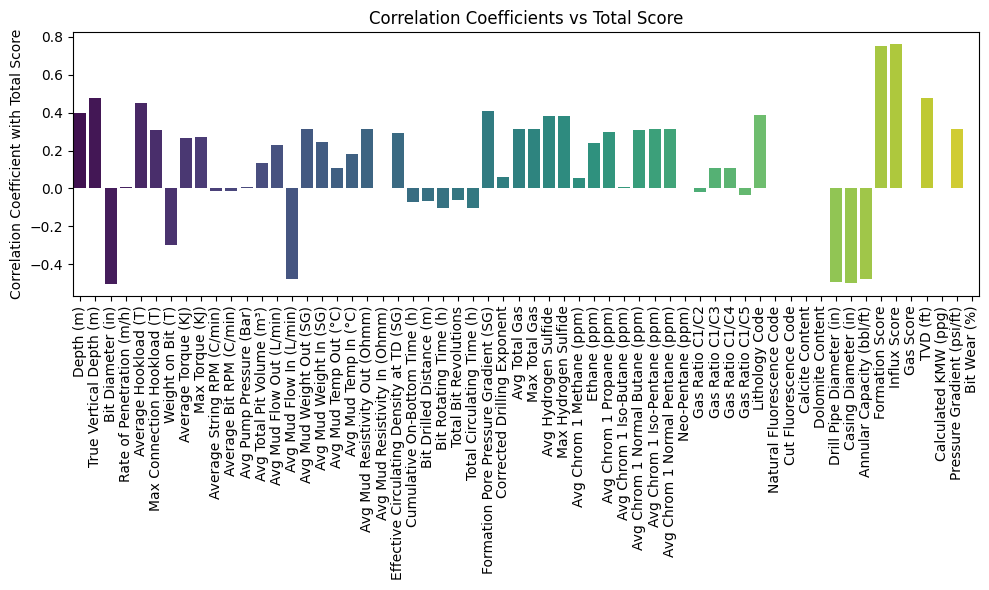

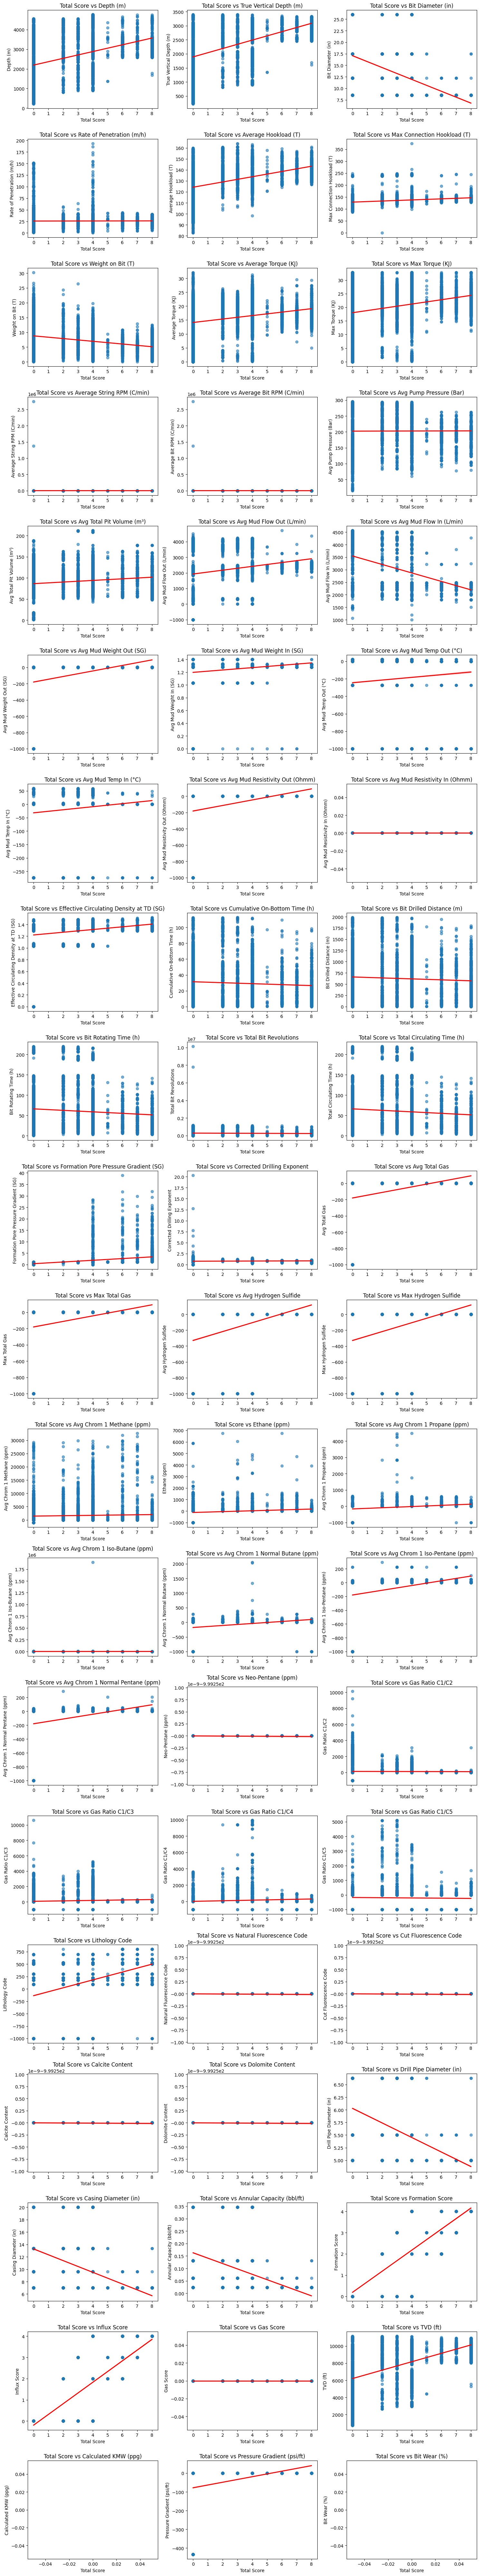

In [23]:
plot_correlations_vs_total_score(full_mwd_df)

In [24]:
full_mwd_df_integrated.value_counts('Kick_Type_2')

,count
Kick_Type_2,
Severe Kick,10474
No Kick,1132
Moderate Kick,519
Minor Kick,17


In [25]:
# Save the classified DataFrame to a CSV file without the index
full_mwd_df_integrated.to_csv("classified_well_kick_data.csv", index=False)
